<center>
  <img src="JHU.png" width=200/>
</center>

## Autograder Assignment: Image Classification Using PyTorch

**Estimated Time Needed: 60 Minutes**

### Overview

In this hands-on lab, you will work on image classification using PyTorch and the Intel image dataset. The assignment covers downloading and exploring the dataset, building a fully connected neural network, and implementing a convolutional neural network (CNN) for classification. You will also apply regularization techniques to improve model robustness and evaluate performance.

### Learning Objectives

By the end of this assignment, you will be able to:

- Download and preprocess image data using OpenCV.
- Convert image datasets into NumPy arrays and scale them.
- Build and train a fully connected neural network using PyTorch.
- Develop a convolutional neural network (CNN) for image classification.
- Implement regularization techniques to improve model performance and robustness.

### Dataset Information

The Intel image dataset consists of various categories like 'buildings,' 'forest,' 'glacier,' 'mountain,' 'sea,' and 'street.' The dataset is used for training and testing machine learning models on image classification tasks.







### Problem 1:  Download the dataset, unzip and explore the file folders. Load the image datasetwith training and testing grouped. (Note, cv2 reads and saves in BGR channel order)  Display a few images. How many color channels are there?


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Unzip the images
!unzip -o seg_test.zip

Archive:  seg_test.zip
   creating: seg_test/buildings/
  inflating: seg_test/buildings/20057.jpg  
  inflating: seg_test/buildings/20060.jpg  
  inflating: seg_test/buildings/20061.jpg  
  inflating: seg_test/buildings/20064.jpg  
  inflating: seg_test/buildings/20073.jpg  
  inflating: seg_test/buildings/20074.jpg  
  inflating: seg_test/buildings/20078.jpg  
  inflating: seg_test/buildings/20083.jpg  
  inflating: seg_test/buildings/20094.jpg  
  inflating: seg_test/buildings/20096.jpg  
  inflating: seg_test/buildings/20113.jpg  
  inflating: seg_test/buildings/20131.jpg  
  inflating: seg_test/buildings/20140.jpg  
  inflating: seg_test/buildings/20177.jpg  
  inflating: seg_test/buildings/20186.jpg  
  inflating: seg_test/buildings/20206.jpg  
  inflating: seg_test/buildings/20207.jpg  
  inflating: seg_test/buildings/20218.jpg  
  inflating: seg_test/buildings/20228.jpg  
  inflating: seg_test/buildings/20231.jpg  
  inflating: seg_test/buildings/20241.jpg  
  inflating: seg_tes

In [3]:
# Paths and labels
_labels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']  # Categories
IMGSIZE = (128, 128)  # Resize all images to 128x128 pixels
CNAMES = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']  # Duplicate of _labels for label indexing
X_tr, y_tr = [], []  # Empty lists to store images and labels
def saveimages_inlist():
    """
    Function to load images from subdirectories corresponding to different categories,
    resize them to a uniform size (128x128), and return the images along with their labels.

    Returns:
    --------
    X_tr : list
        A list containing all the resized images as numpy arrays.
    y_tr : list
        A list containing the corresponding label indices of the images.

    Steps:
    1. The function defines a list of labels (_labels) which correspond to the directories
       where images are stored. Each subdirectory is named after a category (e.g., 'buildings', 'forest').
    2. The images are resized to 128x128 pixels (IMGSIZE).
    3. An empty list, X_tr, is used to store the resized images, and y_tr stores the label indices.
    4. For each label in _labels, the function constructs the path to the images of that label.
       It reads all '.jpg' files, resizes them, and appends them to the X_tr list.
       The corresponding label's index is appended to y_tr.
    5. Finally, the function returns the list of images (X_tr) and their labels (y_tr).

    Example:
    --------
    If the 'seg_train' directory contains folders 'buildings', 'forest', etc., 
    each with several images, the function will load all the images, resize them, 
    and return two lists: one with the resized images and another with the corresponding labels.
    """

    
    
    # Load images
    for label in _labels:
        path = os.path.join('seg_test', label)  # Construct the path for each category
        # Read all .jpg images from the directory
        
        # Read and resize the image and append that to the list X_tr. Use  cv2.resize.
        
        #  # Append the index of the label to y_tr
        # your code here
        for file in os.listdir(path):
            if file.endswith('.jpg'):  # Check if the file is a jpg image
                img_path = os.path.join(path, file)
                img = cv2.imread(img_path)  # Read the image using OpenCV
                img = cv2.resize(img, IMGSIZE)  # Resize the image
                X_tr.append(img)  # Append image to list
                y_tr.append(_labels.index(label))  # Append label index

    return X_tr, y_tr  # Return the images and their corresponding label indices


Number of channels= 3


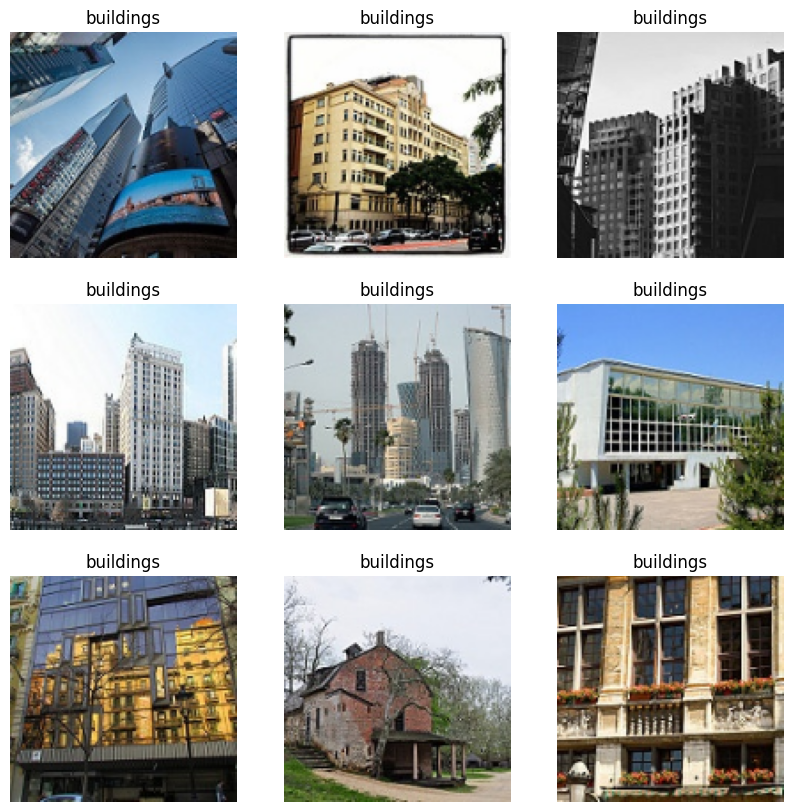

In [4]:
# Note: This is a read-only cell and cannot be edited.
X_tr,y_tr=saveimages_inlist()
# Check the number of color channels
print ("Number of channels=",X_tr[0].shape[2])
 # Display a few images
plt.figure(figsize=(10, 10))
for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(cv2.cvtColor(X_tr[i], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
        plt.title(CNAMES[y_tr[i]])
        plt.axis('off')
plt.show()


### Problem 2: Convert the image dataset into a numpy array and scale the images to values between [0, 1].



In [5]:
def convert_toNumpyarray(X_tr, y_tr):
    """
    Function to convert the lists of images and labels into numpy arrays and normalize the image data.

    Parameters:
    -----------
    X_tr : list
        A list containing image data, where each image is represented as a 3D array (height, width, channels).
    y_tr : list
        A list containing the corresponding label indices for each image.

    Returns:
    --------
    X_tr : numpy.ndarray
        A numpy array containing all the image data, normalized to a range of [0, 1].
    y_tr : numpy.ndarray
        A numpy array containing the label indices.

    Steps:
    ------
    1. Converts the list `X_tr`, which contains the images, into a numpy array with dtype 'float32'.
    2. Normalizes the image data by dividing the pixel values by 255, scaling the pixel range from [0-255] to [0-1].
    3. Converts the list `y_tr`, which contains the label indices, into a numpy array.

    Example:
    --------
    If `X_tr` is a list of resized images and `y_tr` contains the corresponding labels,
    this function will convert both lists to numpy arrays and normalize the pixel values of the images.
    """
    # Convert X_tr (images) to a numpy array and scale pixel values to the range [0, 1]
    # Convert y_tr (labels) to a numpy array
    # your code here
    # Convert images to a numpy array with dtype float32
    X_tr = np.array(X_tr, dtype=np.float32)
    
    # Normalize pixel values to the range [0, 1]
    X_tr /= 255.0

    # Convert labels to a numpy array
    y_tr = np.array(y_tr, dtype=np.int64)

    return X_tr, y_tr  # Return the normalized images and label arrays



In [6]:
# Note: This is a read-only cell and cannot be edited.
X_tr,y_tr=convert_toNumpyarray(X_tr, y_tr)


print("X_tr.shape=",X_tr.shape)
print("y_tr.shape=",y_tr.shape[0])

X_tr.shape= (3000, 128, 128, 3)
y_tr.shape= 3000


### Problem 3:Create a fully connected neural network and report its performance on the dataset.

* Define a simple neural network with 3 fully connected layers.

* Train it for 10 epochs and report the loss and accuracy.


In [7]:
!pip install torch
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 117.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 226.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 188.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 274.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 188.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 153.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 296.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 297.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 249.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 273.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.1/150.1 MB 276.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [8]:
class SimpleNN(nn.Module):
    """
    A simple feedforward neural network for classification tasks.

    This model consists of three fully connected layers with ReLU activations.
    It is designed to process images of a specific size (e.g., 128x128 pixels with 3 color channels).

    Attributes:
        fc1 (nn.Linear): The first fully connected layer, which takes flattened image data as input and outputs 512 features.
        fc2 (nn.Linear): The second fully connected layer, which takes the 512 features from the first layer and outputs 256 features.
        fc3 (nn.Linear): The output layer, which takes the 256 features from the second layer and outputs the final class predictions (10 classes).
    """

    def __init__(self):
        """
        Initializes the SimpleNN class.

        The layers are defined and initialized:
        - Three fully connected layers for the feedforward network.
        - The input size is adjusted based on the expected flattened image size.
        """
        super(SimpleNN, self).__init__()  # Initialize the parent class

        # Define the layers
        self.fc1 = nn.Linear(3 * 128 * 128, 512)  # First fully connected layer (input: flattened image size, output: 512 neurons)
        self.fc2 = nn.Linear(512, 256)            # Second fully connected layer (input: 512 neurons, output: 256 neurons)
        self.fc3 = nn.Linear(256, 10)             # Output layer (input: 256 neurons, output: 10 classes)

    def forward(self, x):
        """
        Defines the forward pass of the network.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, channels, height, width),
                              where channels = 3 for RGB images, and height and width = 128 pixels.

        Returns:
            torch.Tensor: Output predictions of shape (batch_size, number_of_classes),
                          containing the logits for each class.
        """
        # Flatten the input tensor to prepare for the fully connected layers
        x = x.reshape(x.size(0), -1)  # Reshape to (batch_size, -1) to flatten the tensor

        # Pass through the first fully connected layer and apply ReLU activation
        x = torch.relu(self.fc1(x))

        # Pass through the second fully connected layer and apply ReLU activation
        x = torch.relu(self.fc2(x))

        # Pass through the output layer to get predictions
        x = self.fc3(x)  # Output layer (final predictions)

        return x  # Return the output predictions

def test_fully_connected_network(X_tr, y_tr):
    """
    Trains a fully connected neural network on the given training data and evaluates it on a validation set.

    Parameters:
    X_tr (numpy.ndarray): Training data features (input).
    y_tr (numpy.ndarray): Training data labels (output).

    Returns:
    float: The validation accuracy after training.
    """
    
    # Split data into training and validation sets (80-20 split)
    X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.2, random_state=42)

    # Convert data to PyTorch tensors and move to the appropriate device (CPU or GPU)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)  # Training features
    y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)      # Training labels
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)      # Validation features
    y_val_tensor = torch.tensor(y_val, dtype=torch.long).to(device)          # Validation labels

    # Initialize the simple neural network
    input_size = X_train_tensor.shape[1]  # Determine the input size from the training data
    num_classes = len(torch.unique(y_train_tensor))  # Count the number of unique classes in the labels
    model = SimpleNN().to(device)  # Create the model and move it to the device
    criterion = nn.CrossEntropyLoss()  # Loss function for multi-class classification
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate of 0.001

    # Training loop
    num_epochs = 10  # Set the desired number of epochs for training
    batch_size = 32  # Define a batch size for training

    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode

        # Shuffle training data for each epoch to improve training efficiency
        indices = torch.randperm(X_train_tensor.size(0))  # Generate random indices for shuffling
        X_train_tensor = X_train_tensor[indices]  # Shuffle the training features
        y_train_tensor = y_train_tensor[indices]  # Shuffle the training labels

        # Mini-batch training
        for i in range(0, X_train_tensor.size(0), batch_size):
            batch_X = X_train_tensor[i:i + batch_size]  # Get a mini-batch of training data
            batch_y = y_train_tensor[i:i + batch_size]  # Corresponding labels for the mini-batch
            
            # Zero the parameter gradients for the optimizer
            optimizer.zero_grad()
            
            # Forward pass: Compute predicted outputs by passing inputs to the model
            outputs = model(batch_X)

            # Compute the loss
            loss = criterion(outputs, batch_y)

            # Backward pass: Compute the gradient of the loss with respect to model parameters
            loss.backward()

            # Update the model parameters based on the gradients
            optimizer.step()

            # Clear unused variables to manage memory
            del batch_X, batch_y, outputs, loss  # Delete tensors to free up memory
            torch.cuda.empty_cache()  # Free up GPU memory if using CUDA

        # Validation step
        model.eval()  # Set the model to evaluation mode
        with torch.no_grad():  # Disable gradient computation during validation
            val_outputs = model(X_val_tensor)  # Get the model output for the validation set
            val_preds = torch.argmax(val_outputs, dim=1)  # Predict the class with the highest score
            val_accuracy = accuracy_score(y_val, val_preds.cpu().numpy())  # Calculate validation accuracy

        # Print the validation accuracy after each epoch
        print(f'Epoch [{epoch + 1}/{num_epochs}], Validation Accuracy: {val_accuracy:.4f}')

    # Return the final validation accuracy
    return val_accuracy

In [9]:
# Note: This is a read-only cell and cannot be edited.
val_accuracy = test_fully_connected_network(X_tr, y_tr)

    
print("Validation accuracy=",val_accuracy)



Epoch [1/10], Validation Accuracy: 0.3817
Epoch [2/10], Validation Accuracy: 0.3750
Epoch [3/10], Validation Accuracy: 0.4033
Epoch [4/10], Validation Accuracy: 0.4100
Epoch [5/10], Validation Accuracy: 0.4283
Epoch [6/10], Validation Accuracy: 0.4650
Epoch [7/10], Validation Accuracy: 0.4817
Epoch [8/10], Validation Accuracy: 0.5033
Epoch [9/10], Validation Accuracy: 0.5217
Epoch [10/10], Validation Accuracy: 0.4817
Validation accuracy= 0.4816666666666667


### Problem 4: Create a convolutional neural network with dropout and regularization, and report its performance.

* Define a CNN with 2 convolutional layers and 2 fully connected layers.
* Add dropout after the fully connected layers to prevent overfitting.
* Train the model and report the validation accuracy.



In [10]:
class RegularizedCNN(nn.Module):
    """
    A Convolutional Neural Network (CNN) with regularization to classify images.

    This model consists of two convolutional layers followed by max pooling,
    a couple of fully connected layers, and dropout for regularization.

    Attributes:
    - conv1: First convolutional layer.
    - conv2: Second convolutional layer.
    - pool: Max pooling layer to downsample feature maps.
    - fc1: First fully connected layer.
    - fc2: Output layer with neurons equal to the number of classes.
    - dropout: Dropout layer for regularization.
    """

    def __init__(self):
        """
        Initializes the RegularizedCNN class.

        The layers are defined and initialized:
        - Two convolutional layers with ReLU activations and padding.
        - A max pooling layer to reduce dimensionality.
        - Two fully connected layers for classification.
        - A dropout layer to help prevent overfitting.
        """
        super(RegularizedCNN, self).__init__()  # Initialize the parent class

        # Define the layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  # First convolutional layer (input: 3 channels, output: 32 channels)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # Second convolutional layer (input: 32 channels, output: 64 channels)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling layer (kernel size: 2, stride: 2)
        self.fc1 = nn.Linear(64 * 32 * 32, 128)  # First fully connected layer (input: flattened features, output: 128 neurons)
        self.fc2 = nn.Linear(128, len(CNAMES))  # Output layer (input: 128 neurons, output: number of classes)
        self.dropout = nn.Dropout(0.5)  # Dropout layer with 50% drop probability

    def forward(self, x):
        """
        Defines the forward pass of the network.

        Args:
        - x (torch.Tensor): Input tensor of shape (batch_size, channels, height, width).

        Returns:
        - torch.Tensor: Output predictions of shape (batch_size, number_of_classes).
        """
        # Pass through the first convolutional layer and apply ReLU and max pooling
        x = self.pool(torch.relu(self.conv1(x)))

        # Pass through the second convolutional layer and apply ReLU and max pooling
        x = self.pool(torch.relu(self.conv2(x)))

        # Flatten the tensor to prepare for fully connected layers
        x = x.reshape(x.size(0), -1)  # Reshape to (batch_size, -1)

        # Pass through the first fully connected layer, apply ReLU, and dropout
        x = self.dropout(torch.relu(self.fc1(x)))

        # Pass through the output layer to get predictions
        return self.fc2(x)  # Output layer (final predictions)

def test_convolution_network(X_tr, y_tr):
    """
    Trains a convolutional neural network on the given training data and evaluates it on a validation set.

    Parameters:
    X_tr (numpy.ndarray): Training data features, expected to have shape (num_samples, height, width, channels).
    y_tr (numpy.ndarray): Training data labels, expected to be a 1D array of class indices.

    Returns:
    float: The validation accuracy after training.
    """

    # Split data into training and validation sets (80-20 split)
    X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.2, random_state=42)

    # Convert data to PyTorch tensors
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).permute(0, 3, 1, 2).to(device)  # Rearranging dimensions to (batch_size, channels, height, width)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)  # Convert labels to tensor and move to device
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).permute(0, 3, 1, 2).to(device)  # Validation data
    y_val_tensor = torch.tensor(y_val, dtype=torch.long).to(device)  # Validation labels


    # Initialize the convolutional neural network model and optimizer
    model = RegularizedCNN().to(device)  # Instantiate the model and move it to the specified device
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with a learning rate of 0.001
    criterion = nn.CrossEntropyLoss()  # Define the loss function for multi-class classification
    batch_size = 32  # Set the batch size for training
    num_epochs = 10  # Set the number of training epochs

    # Training loop for the specified number of epochs
    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode

        # Shuffle training data for each epoch to improve training efficiency
        indices = torch.randperm(X_train_tensor.size(0))  # Generate a random permutation of indices
        X_train_tensor = X_train_tensor[indices]  # Shuffle training data
        y_train_tensor = y_train_tensor[indices]  # Shuffle training labels

        # Mini-batch training
        for i in range(0, X_train_tensor.size(0), batch_size):
            
            # Get a mini-batch of training data and assign it to a variable batch_X
            # Get corresponding labels for the mini-batch and assign it to a variable batch_Y
            # Zero the parameter gradients for the optimizer
            # Forward pass: Compute predicted outputs by passing inputs to the model            
            # Compute the loss            
            # Backward pass: Compute gradient of the loss with respect to model parameters            
            # Backpropagate the loss            
            # Update the model parameters based on the gradients
            
            # your code here
            batch_X = X_train_tensor[i:i + batch_size]  # Extract mini-batch features
            batch_y = y_train_tensor[i:i + batch_size]  # Extract mini-batch labels

            optimizer.zero_grad()  # Clear previous gradients
            outputs = model(batch_X)  # Forward pass
            loss = criterion(outputs, batch_y)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update model parameters
            
            # Clear unused variables to manage memory
            del batch_X, batch_y, outputs, loss  # Delete tensors to free up memory
            torch.cuda.empty_cache()  # Free up GPU memory if using CUDA

        # Validation step
        model.eval()  # Set the model to evaluation mode
        with torch.no_grad():  # Disable gradient computation during validation
            val_outputs = model(X_val_tensor)  # Get the model output for the validation set
            val_preds = torch.argmax(val_outputs, dim=1)  # Predict the class with the highest score
            val_accuracy = accuracy_score(y_val, val_preds.cpu().numpy())  # Calculate validation accuracy

        # Print the validation accuracy after each epoch
        print(f'Epoch [{epoch + 1}/{num_epochs}], Validation Accuracy: {val_accuracy:.4f}')

    # Return the final validation accuracy
    return val_accuracy


In [11]:
# Note: This is a read-only cell and cannot be edited.
val_accuracy = test_convolution_network(X_tr, y_tr)

    
print("Validation accuracy=",val_accuracy)


Epoch [1/10], Validation Accuracy: 0.5333
Epoch [2/10], Validation Accuracy: 0.5933
Epoch [3/10], Validation Accuracy: 0.5717
Epoch [4/10], Validation Accuracy: 0.6450
Epoch [5/10], Validation Accuracy: 0.6650
Epoch [6/10], Validation Accuracy: 0.6883
Epoch [7/10], Validation Accuracy: 0.6950
Epoch [8/10], Validation Accuracy: 0.6917
Epoch [9/10], Validation Accuracy: 0.7067
Epoch [10/10], Validation Accuracy: 0.6917
Validation accuracy= 0.6916666666666667


Congratulations! for completing this Autograded Assignment.